In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from rfms.readers import ForestReader
from rfms.storytellers import individual_signed_feature_importance, oob_feature_importance
import matplotlib.pyplot as plt
import seaborn as sns

/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
data = pd.read_csv('../data/enhancer.csv', index_col=0)
data.head()

,H3_c12,H3_c14a,H3_c14c,H3_c8,H3K18ac_c12,H3K18ac_c14a,H3K18ac_c14c,H3K18ac_c8,H3K27ac_c12,H3K27ac_c14a,...,shn2,shn3,slp1,sna1,sna2,tll1,twi1,twi2,z2,active
VT0002,6,10,10,8,5,7,8,9,12,17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0
VT0003,6,7,6,5,19,10,11,0,4,15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0
VT0004,14,9,14,13,11,9,19,10,1,15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.20130,0
VT0005,13,17,13,13,19,14,25,10,29,20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0
VT0006,6,6,6,10,13,23,28,10,8,69,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.21019,1


In [3]:
data.iloc[:,:-1].head()

,H3_c12,H3_c14a,H3_c14c,H3_c8,H3K18ac_c12,H3K18ac_c14a,H3K18ac_c14c,H3K18ac_c8,H3K27ac_c12,H3K27ac_c14a,...,run2,shn2,shn3,slp1,sna1,sna2,tll1,twi1,twi2,z2
VT0002,6,10,10,8,5,7,8,9,12,17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
VT0003,6,7,6,5,19,10,11,0,4,15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
VT0004,14,9,14,13,11,9,19,10,1,15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.20130
VT0005,13,17,13,13,19,14,25,10,29,20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
VT0006,6,6,6,10,13,23,28,10,8,69,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.21019


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    np.array(data.iloc[:,:-1]), np.array(data.iloc[:,-1]), train_size=0.5,
    random_state=2017)
rf = RandomForestClassifier(
    n_estimators=100, random_state=1231, bootstrap=True)
rf.fit(X=X_train, y=y_train)
#print(rf.estimators_[0].tree_.value[0])
b = ForestReader()
b.read_from(rf, X_test, TreeReaderType = 'Importance')
b.summary()
out, feature_importances_ = individual_signed_feature_importance(b, y_test)
print(out.head())
print(rf.feature_importances_)
print(feature_importances_)

/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Here is the summary.
Number of features is 80
Number of samples is 3905
Number of paths is 21090
Some samples from self.info_
        f0        f1       f10       f11       f12       f13  f14       f15  \
2726   0.0  0.092593  0.000000  0.000000 -0.048167  0.000000  0.0  0.000000   
253    0.0  0.000000 -0.001452  0.000000  0.583333  0.000000  0.0  0.000000   
13877  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.000000   
18711  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.000000   
8240   0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.000000   
1669   0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.000000   
7316   0.0  0.000000  0.000000  0.000000  0.000000 -0.000576  0.0 -0.001148   
5573   0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.000000   
14619  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.000000   
11283  0.0  0.000000  0.000000  0.589474  0.000000  0.000000  0.0  0.000000   

    

76 tll1 0.03390227800767942


Text(0.5,0,'feature values')

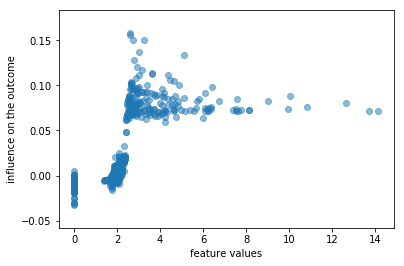

In [5]:
tmp = np.argsort(feature_importances_)[-2]
print(tmp,data.columns[tmp], rf.feature_importances_[tmp])
ind = tmp
plt.scatter(X_test[:,ind], out.loc[:,'f'+str(ind)], alpha=.5)
plt.ylabel('influence on the outcome')
plt.xlabel('feature values')

In [6]:
group1 = (out.loc[:,'f45'] < -0.01) & (X_test[:,45] < 250)
group2 = (out.loc[:,'f45'] > -0.01) & (X_test[:,45] < 250) & (out.loc[:,'f45'] < 0.02)

(80,) (80,)
[28 44 20 24 14 19 23 27 45 43  9  6 10  5 35 36 34 13  4  7 77 78 50 49
 48 53 51 66 63 64  8 58 73 59 55 68 76 32 31 60 56 67 54 57 69 75 37 62
 21 47 79 52 71 70 74 46 65 61 15 72 26 12 39 42 30 41 29 18 38  3  1 40
  0 11  2 16 22 33 25 17]
[ 1.38343681e+00  1.19604997e+00  2.54280356e+00  1.17318274e+00
 -1.64973281e+00 -4.06331124e+00 -4.49609660e+00 -1.50522442e+00
 -8.78209954e-01 -4.83575805e+00 -4.21827749e+00  1.59780874e+00
  9.61201496e-02 -1.86309835e+00 -1.40567440e+01 -4.81982296e-02
  2.59483632e+00  8.86000812e+00  7.95191682e-01 -1.32001879e+01
 -2.06603147e+01 -2.85790802e-01  2.97124370e+00 -7.14048811e+00
 -1.83603072e+01  6.36225555e+00  1.71035042e-02 -6.46890579e+00
 -2.17632301e+01  6.97171648e-01  4.13893998e-01 -6.14673847e-01
 -6.30328534e-01  3.21036588e+00 -2.24141564e+00 -3.02792524e+00
 -2.81206266e+00 -4.09062735e-01  1.02759487e+00  1.28970295e-01
  1.33355888e+00  6.55520200e-01  3.25415318e-01 -5.93097492e+00
 -2.09321393e+01 -5.99780317

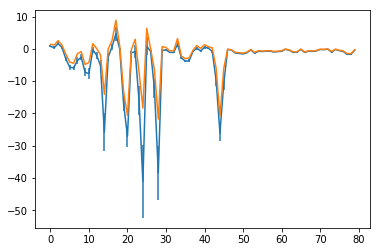

In [7]:
mean1, var1 = np.mean(X_test[group1,:], axis=0), np.std(X_test[group1,:], axis=0) / sum(group1) ** .5
mean2, var2 = np.mean(X_test[group2,:], axis=0), np.std(X_test[group2,:], axis=0) / sum(group2) ** .5
print(mean1.shape, mean2.shape)
plt.errorbar(np.arange(80), y=mean2 - mean1, yerr=(var1**2 + var2**2)**.5)
plt.errorbar(np.arange(80), y=mean2 - mean1 + 2 * (var1**2 + var2**2)**.5)
print(np.argsort(mean2 - mean1 + 2 *(var1**2 + var2**2)**.5))
print(mean2 - mean1 + 2 *(var1**2 + var2**2)**.5)

In [8]:
plt.errorbar

<function matplotlib.pyplot.errorbar(x, y, yerr=None, xerr=None, fmt='', ecolor=None, elinewidth=None, capsize=None, barsabove=False, lolims=False, uplims=False, xlolims=False, xuplims=False, errorevery=1, capthick=None, hold=None, data=None, **kwargs)>

Text(0,0.5,'H3K4me1_c14c')

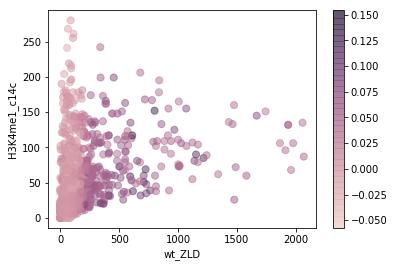

In [9]:
ind1 = 45
ind2 = 20
plt.scatter(X_test[:,ind1], X_test[:,ind2], c = out.loc[:,'f'+str(ind1)] , s = 50, cmap = sns.cubehelix_palette(as_cmap=True), alpha=.5)
plt.colorbar()
plt.xlabel(data.columns[ind1])
plt.ylabel(data.columns[ind2])

In [16]:
oob_feature_importance(rf, X_train, y_train)

array([-0.00063317, -0.00049009, -0.0018512 , -0.00676527, -0.00804697,
       -0.00013305,  0.00112716, -0.00278426, -0.00155526,  0.00022436,
       -0.00052813, -0.00234721, -0.0016935 , -0.00300716, -0.00561726,
       -0.00050064, -0.00132896, -0.00332   ,  0.00055904,  0.00285863,
        0.00488063, -0.00562847, -0.00178936,  0.00237325, -0.00288527,
       -0.0078094 , -0.00236844,  0.00044484, -0.00194112, -0.00270641,
       -0.00398677,  0.00107203,  0.00034704,  0.00788781, -0.00066616,
       -0.00424916, -0.00292205,  0.00059819, -0.00230025,  0.0002193 ,
       -0.00394294, -0.00351272, -0.00217496, -0.00464284, -0.00498457,
        0.06325967,  0.00050584,  0.04306147,  0.03425895,  0.03928991,
        0.02636762,  0.00133711,  0.00723407,  0.10937323, -0.0025003 ,
        0.01597076,  0.01836077,  0.00925923,  0.03236636,  0.01998302,
        0.00468319,  0.00320684,  0.07440313,  0.066995  ,  0.08028912,
        0.00268297,  0.05222618,  0.05711741,  0.02274675,  0.00

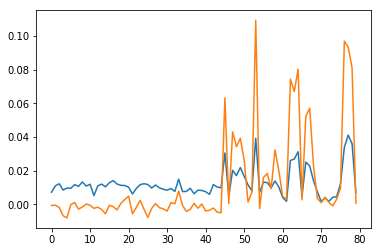

In [10]:
plt.plot(rf.feature_importances_)
plt.plot(oob_feature_importance(rf, X_train, y_train))


In [11]:
out = oob_feature_importance(rf, X_train, y_train)

In [12]:
_, test_feature_importance = individual_signed_feature_importance(forestReader=b, labels=y_test)

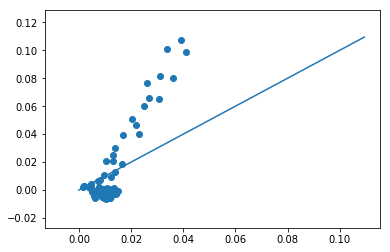

In [13]:
plt.scatter(rf.feature_importances_, test_feature_importance, marker = 'o')
plt.plot([0, max(out)], [0, max(out)])

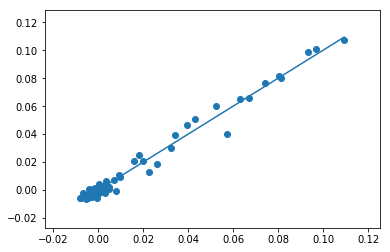

In [14]:
plt.scatter(out, test_feature_importance, marker = 'o')
plt.plot([0, max(out)], [0, max(out)])

In [15]:
np.sum((out - test_feature_importance) ** 2) / np.sum((rf.feature_importances_ - test_feature_importance) ** 2)

0.032991957582402025

## oob feature importance is closer to test than original feature importance

# get the feature importance after permuting the labels

In [14]:
data.columns

Index(['H3_c12', 'H3_c14a', 'H3_c14c', 'H3_c8', 'H3K18ac_c12', 'H3K18ac_c14a',
       'H3K18ac_c14c', 'H3K18ac_c8', 'H3K27ac_c12', 'H3K27ac_c14a',
       'H3K27ac_c14c', 'H3K27ac_c8', 'H3K27me3_c12', 'H3K27me3_c14a',
       'H3K27me3_c14c', 'H3K36me3_c12', 'H3K36me3_c14a', 'H3K36me3_c14c',
       'H3K4me1_c12', 'H3K4me1_c14a', 'H3K4me1_c14c', 'H3K4me1_c8',
       'H3K4me3_c12', 'H3K4me3_c14a', 'H3K4me3_c14c', 'H3K4me3_c8',
       'H3K9ac_c12', 'H3K9ac_c14a', 'H3K9ac_c14c', 'H3K9ac_c8', 'H4K5ac_c12',
       'H4K5ac_c14a', 'H4K5ac_c14c', 'H4K5ac_c8', 'H4K8ac_c12', 'H4K8ac_c14a',
       'H4K8ac_c14c', 'H4K8ac_c8', 'input_c12', 'input_c14a', 'input_c14c',
       'input_c8', 'wt_H3', 'wt_H3K18ac', 'wt_H3K4me1', 'wt_ZLD', 'bcd1',
       'bcd2', 'cad1', 'D1', 'da2', 'dl3', 'ftz3', 'gt2', 'h1', 'h2', 'hb1',
       'hb2', 'hkb1', 'hkb2', 'hkb3', 'kni1', 'kni2', 'kr1', 'kr2', 'mad2',
       'med2', 'prdBQ', 'prdFQ', 'run1', 'run2', 'shn2', 'shn3', 'slp1',
       'sna1', 'sna2', 'tll1', 'twi1', '

/home/yu/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Index(['wt_ZLD', 'H3K4me3_c14a', 'H3K27me3_c14c', 'wt_H3K18ac',
       'H3K36me3_c14c', 'wt_H3K4me1', 'H3K27me3_c12', 'H4K5ac_c8', 'wt_H3',
       'H3K27me3_c14a', 'input_c14a', 'H3K4me3_c14c', 'H3K36me3_c12',
       'H3K36me3_c14a', 'H3K4me1_c14a', 'H3K18ac_c12', 'H3K4me3_c12',
       'input_c14c', 'H3K18ac_c14a', 'H3K9ac_c14c', 'H3K9ac_c8', 'H3K18ac_c8',
       'H3K27ac_c12', 'H3K27ac_c14a', 'H4K8ac_c14c', 'H4K5ac_c12',
       'H3K4me1_c8', 'H3K4me1_c14c', 'H3K4me3_c8', 'input_c12', 'H3K4me1_c12',
       'H4K8ac_c14a', 'H3K9ac_c14a', 'H3_c14a', 'H4K8ac_c12', 'H3K27ac_c14c',
       'dl3', 'input_c8', 'H3_c12', 'H3K9ac_c12', 'H3K18ac_c14c', 'H3_c8',
       'sna2', 'H3_c14c', 'H4K5ac_c14a', 'H4K8ac_c8', 'twi2', 'twi1',
       'H4K5ac_c14c', 'H3K27ac_c8', 'D1', 'da2', 'kr2', 'kr1', 'z2', 'med2',
       'h2', 'mad2', 'hb2', 'prdFQ', 'slp1', 'prdBQ', 'run1', 'ftz3', 'h1',
       'cad1', 'kni2', 'bcd2', 'bcd1', 'hb1', 'gt2', 'hkb3', 'sna1', 'run2',
       'hkb1', 'hkb2', 'shn2', 'tll1', 'sh

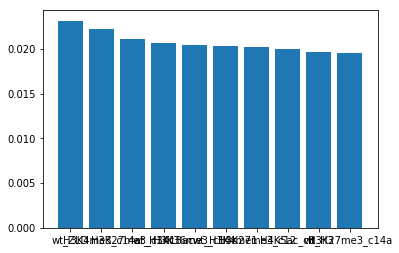

In [49]:
data.iloc[:,-1] = np.random.permutation(data.iloc[:,-1])
X_train, X_test, y_train, y_test = train_test_split(
    np.array(data.iloc[:,:-1]), np.array(data.iloc[:,-1]), train_size=0.5,
    random_state=2017)

rf = RandomForestClassifier(
    n_estimators=100, bootstrap=True, max_depth = None)

rf.fit(X=X_train, y=y_train)
ix = np.argsort(rf.feature_importances_ * -1)
topk = 10
plt.bar(x = np.arange(topk), height=rf.feature_importances_[ix][:topk])
plt.xticks(ticks = np.arange(topk), labels=data.columns[ix[:topk]])
print(data.columns[ix])

## test how many times wt_ZLD is the top

In [58]:
a = []
for _ in range(50):
    data.iloc[:,-1] = np.random.permutation(data.iloc[:,-1])
    X_train, X_test, y_train, y_test = train_test_split(
        np.array(data.iloc[:,:-1]), np.array(data.iloc[:,-1]), train_size=0.5)

    rf = RandomForestClassifier(
        n_estimators=100, bootstrap=True, max_depth = None)

    rf.fit(X=X_train, y=y_train)
    ix = np.argsort(rf.feature_importances_ * -1)
    a.append(data.columns[ix[0]])

/home/yu/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/home/yu/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/home/yu/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/home/yu/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/home/yu/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both ar

In [59]:
np.unique(a, return_counts=True)

(array(['H3K27ac_c12', 'H3K27me3_c12', 'H3K36me3_c12', 'H3K36me3_c14c',
        'H3K4me1_c12', 'H3K4me3_c12', 'H3K4me3_c14a', 'H4K5ac_c8', 'wt_H3',
        'wt_H3K18ac', 'wt_H3K4me1', 'wt_ZLD'], dtype='<U13'),
 array([ 1,  1,  1,  3,  1,  2,  1,  1, 15,  3, 12,  9]))